In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches

In [2]:
# Load data
activities = pd.read_csv("activities.csv", parse_dates=["start date", "end date"])
milestones = pd.read_csv("milestones.csv", parse_dates=["date"])

milestones.tail()

,name,description,date,Unnamed: 3,Unnamed: 4
11,Board accepts recommendation,Admin board officially accepts the recommended...,"July 2, 2025",NaN,NaN
12,Offer letter goes out,Offer letter sent to the selected candidate,"July 3, 2025",NaN,NaN
13,Contract signed,Formal contract signed by the selected candidate,"July 3, 2025",NaN,NaN
14,Public announcement of New ED,Public announcement of the hiring of the new E...,"July 17, 2025",NaN,estimated
15,New ED start date,Start date of the newly hired Executive Director,"Aug 18, 2025",NaN,estimated


In [3]:
# drop the unannamed columns "unammed: 3" and "unammed: 4" if they still exist
milestones = milestones.loc[:, ~milestones.columns.str.contains('^Unnamed')]

milestones.tail()

,name,description,date
11,Board accepts recommendation,Admin board officially accepts the recommended...,"July 2, 2025"
12,Offer letter goes out,Offer letter sent to the selected candidate,"July 3, 2025"
13,Contract signed,Formal contract signed by the selected candidate,"July 3, 2025"
14,Public announcement of New ED,Public announcement of the hiring of the new E...,"July 17, 2025"
15,New ED start date,Start date of the newly hired Executive Director,"Aug 18, 2025"


In [4]:
activities.head()

,name,short name,description,actor,start date,end date
0,Recruit and confirm the hiring committee,Recruit committee,Identification and confirmation of members to ...,Admin board,2025-01-09,2025-02-13
1,Develop the job description,Write job description,Creation and approval of detailed job descript...,Hiring committee,2025-01-09,2025-03-26
2,Find and onboard an executive search firm,Hire search firm,Selection and contracting with an executive se...,Hiring committee,2025-01-27,2025-03-06
3,Develop the call for the role,Draft & release call,Development of job announcement and applicatio...,Hiring committee,2025-03-13,2025-03-26
4,Market the call for the role and recruit quali...,Promote & recruit,Promotion of the job opening and active recrui...,Executive search firm,2025-04-03,2025-05-05


In [5]:
#drop the name column and rename the short name column to name
activities = activities.drop(columns=["name"])
activities = activities.rename(columns={"short name": "name"})
activities.head()

,name,description,actor,start date,end date
0,Recruit committee,Identification and confirmation of members to ...,Admin board,2025-01-09,2025-02-13
1,Write job description,Creation and approval of detailed job descript...,Hiring committee,2025-01-09,2025-03-26
2,Hire search firm,Selection and contracting with an executive se...,Hiring committee,2025-01-27,2025-03-06
3,Draft & release call,Development of job announcement and applicatio...,Hiring committee,2025-03-13,2025-03-26
4,Promote & recruit,Promotion of the job opening and active recrui...,Executive search firm,2025-04-03,2025-05-05


In [6]:
#check that the date columns are in datetime format
print(type(activities['start date'].values[0]))

<class 'numpy.datetime64'>


In [7]:
#coerce to datetime if not already
activities['start date'] = pd.to_datetime(activities['start date'], errors='coerce')
activities['end date'] = pd.to_datetime(activities['end date'], errors='coerce')
milestones['date'] = pd.to_datetime(milestones['date'], errors='coerce')
print(activities.dtypes)
print(milestones.dtypes)

name                   object
description            object
actor                  object
start date     datetime64[ns]
end date       datetime64[ns]
dtype: object
name                   object
description            object
date           datetime64[ns]
dtype: object


In [8]:
milestones.head()

,name,description,date
0,Hiring committee chartered,Formal authorization of the hiring committee,2025-01-09
1,Committee membership finalized,Final composition of the hiring committee,2025-02-13
2,Recruiting firm RFP released,RFP for an executive search firm is released,2025-02-14
3,Recruiting firm contract signed,Contract with selected search firm is signed,2025-03-06
4,Job description finalized,Final version of Executive Director job descri...,2025-03-26


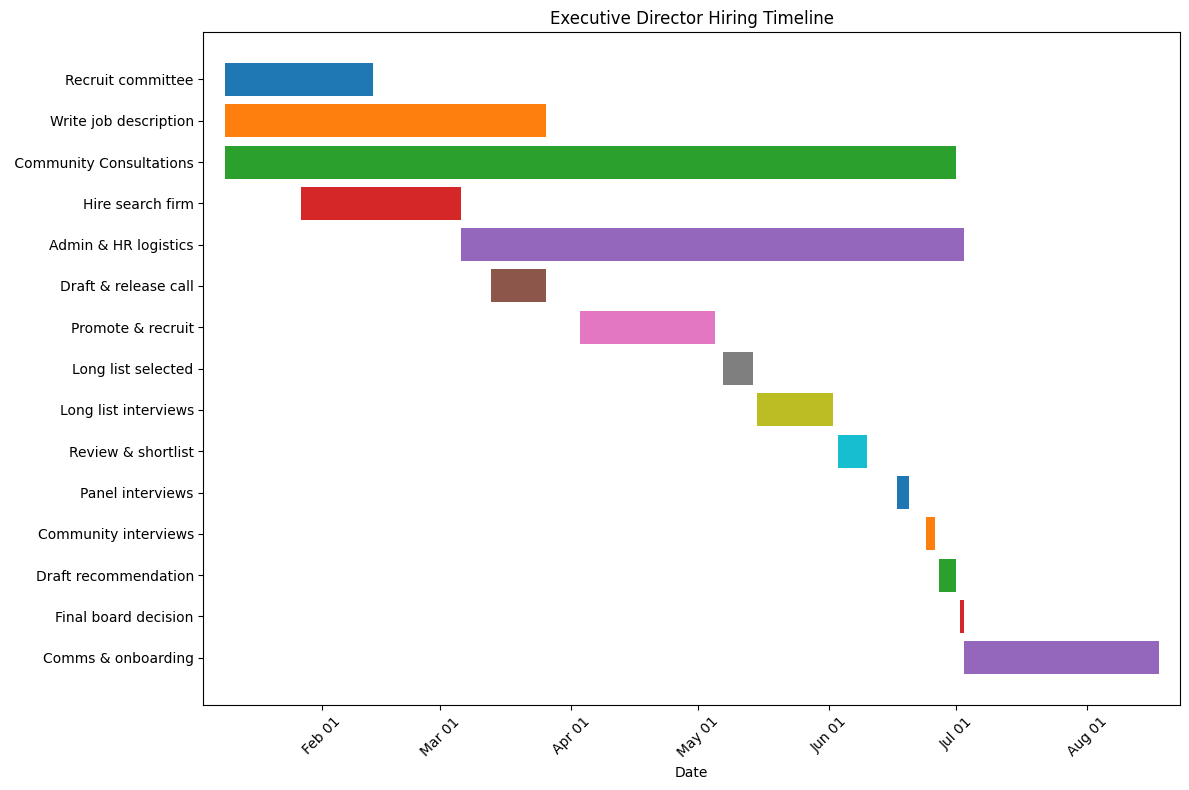

In [9]:
# Sort for cleaner y-axis order
activities = activities.sort_values(by="start date")

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars
for i, row in enumerate(activities.itertuples()):
    ax.barh(i, (row._5 - row._4).days, left=row._4)  # _4=start date, _5=end date by column order

# Format y-axis
ax.set_yticks(range(len(activities)))
ax.set_yticklabels(activities["name"])
ax.invert_yaxis()  # So earliest activity is at the top

# Format x-axis
# Calculate full date range
min_date = activities["start date"].min()
max_date = activities["end date"].max()

# Add some padding (e.g., ±5 days) to make sure everything is visible
padding = pd.Timedelta(days=5)
ax.set_xlim(min_date - padding, max_date + padding)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Layout
ax.set_xlabel("Date")
ax.set_title("Executive Director Hiring Timeline")
plt.tight_layout()
plt.show()


In [10]:

# grab the y-labels for the activities
y_labels = activities["name"].tolist()
print(y_labels)

['Recruit committee', 'Write job description', ' Community Consultations', 'Hire search firm', 'Admin & HR logistics', 'Draft & release call', 'Promote & recruit', 'Long list selected', 'Long list interviews', 'Review & shortlist', 'Panel interviews', 'Community interviews', 'Draft recommendation', 'Final board decision', 'Comms & onboarding']


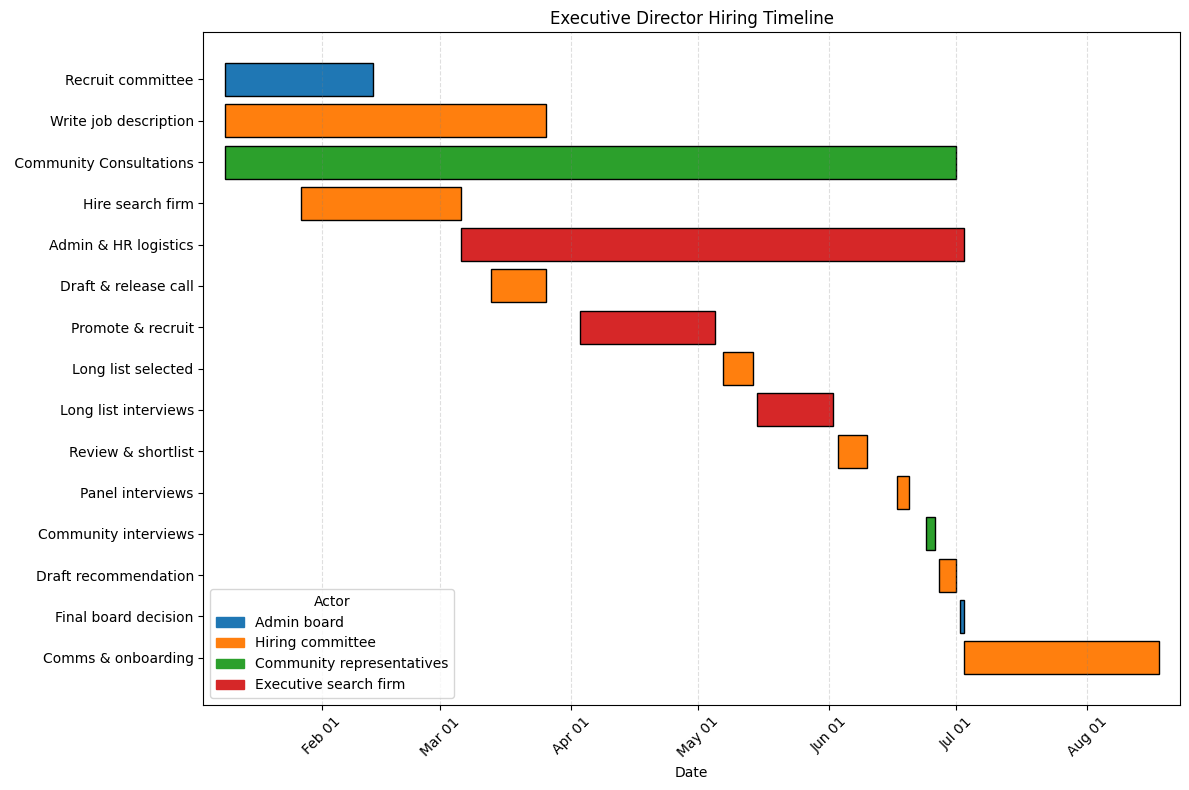

In [11]:
# Build color map from unique actors
unique_actors = activities["actor"].unique()
actor_colors = {actor: f"C{i}" for i, actor in enumerate(unique_actors)}

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot loop using y_labels to determine order
for i, label in enumerate(y_labels):
    row = activities[activities["name"] == label].iloc[0]
    start = row["start date"]
    end = row["end date"]
    duration = (end - start).days or 1  # Ensure at least 1 day
    ax.barh(
        i,
        duration,
        left=start,
        color=actor_colors[row["actor"]],
        edgecolor='black'
    )

# Set custom y-axis labels
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)


# Use short names on y-axis
ax.set_yticks(range(len(activities)))
ax.set_yticklabels(activities["name"])
ax.invert_yaxis()

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Set range and labels
ax.set_xlim(activities["start date"].min() - pd.Timedelta(days=5),
            activities["end date"].max() + pd.Timedelta(days=5))
ax.set_xlabel("Date")
ax.set_title("Executive Director Hiring Timeline")

# grid lines for better readability
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
# Add legend
legend_patches = [mpatches.Patch(color=color, label=actor) for actor, color in actor_colors.items()]
ax.legend(handles=legend_patches, title="Actor", loc='lower left')

plt.tight_layout()
plt.show()
